# Dataset

O dataset é um dataset com dados de acidentes no período de 2017 até 2023 em BRs, Municípios, e contém varias informações como gravidade do acidente, fase do dia, clima, com isso achamos interessante explorar os dados inicialmente para uma análise exploratória para posteriormente fazer uma análise explanatória.

In [20]:
!pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)


ERROR: To modify pip, please run the following command:
C:\Users\mirel\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!pip install --upgrade nbformat plotly

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 4.2.0
    Uninstalling nbformat-4.2.0:
      Successfully uninstalled nbformat-4.2.0



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install matplotlib seaborn pandas numpy plotly geopandas nbformat==4.2.0

  Using cached nbformat-4.2.0-py2.py3-none-any.whl.metadata (1.1 kB)
Using cached nbformat-4.2.0-py2.py3-none-any.whl (153 kB)
  Attempting uninstall: nbformat
    Found existing installation: nbformat 5.10.4
    Uninstalling nbformat-5.10.4:
      Successfully uninstalled nbformat-5.10.4



[notice] A new release of pip is available: 24.1.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Exploração dos dados

In [23]:
# Install the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import geopandas as gpd

In [24]:
import tarfile

# Caminho do arquivo .tar.gz
tar_path = "../data/accidents_2017_to_2023.tar.gz"

# Abre o tar.gz
with tarfile.open(tar_path, "r:gz") as tar:
    # Lista os arquivos dentro do tar.gz
    for member in tar.getmembers():
        print(member.name)  # Mostra os nomes dos arquivos dentro do .tar.gz
        
        # Se encontrar o CSV, lê direto para um DataFrame
        if member.name.endswith(".csv"):
            with tar.extractfile(member) as file:
                df = pd.read_csv(file)
                print(df.head())  # Mostra as primeiras linhas do CSV


./data
./data/accidents_2017_to_2023_portugues.csv
  data_inversa dia_semana   horario  uf     br     km       municipio  \
0   2017-01-01    domingo  01:45:00  RS  116.0   34,9         VACARIA   
1   2017-01-01    domingo  01:00:00  PR  376.0    636  TIJUCAS DO SUL   
2   2017-01-01    domingo  04:40:00  BA  101.0     65      ENTRE RIOS   
3   2017-01-01    domingo  06:30:00  PA  316.0   72,5       CASTANHAL   
4   2017-01-01    domingo  09:00:00  GO   20.0  220,5           POSSE   

                causa_acidente                tipo_acidente  \
0  Defeito Mecânico no Veículo             Colisão traseira   
1      Velocidade Incompatível    Saída de leito carroçável   
2            Condutor Dormindo              Colisão frontal   
3  Falta de Atenção à Condução              Colisão lateral   
4               Defeito na Via  Colisão com objeto estático   

  classificacao_acidente  ... feridos_leves feridos_graves ilesos ignorados  \
0    Com Vítimas Feridas  ...             4         

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   data_inversa            463152 non-null  object 
 1   dia_semana              463152 non-null  object 
 2   horario                 463152 non-null  object 
 3   uf                      463152 non-null  object 
 4   br                      462162 non-null  float64
 5   km                      462162 non-null  object 
 6   municipio               463152 non-null  object 
 7   causa_acidente          463152 non-null  object 
 8   tipo_acidente           463112 non-null  object 
 9   classificacao_acidente  463152 non-null  object 
 10  fase_dia                463152 non-null  object 
 11  sentido_via             463152 non-null  object 
 12  condicao_metereologica  463152 non-null  object 
 13  tipo_pista              463152 non-null  object 
 14  tracado_via         

# Limpeza e Transformação dos Dados


In [26]:
# Convertendo as coluna da data dos acidentes (data_inversa) e horario para o formato data
df['data_acidente']= pd.to_datetime(df['data_inversa'] + df['horario'], format='%Y-%m-%d%H:%M:%S')
# Excluindo colunas desnecessárias
df = df.drop(columns=['delegacia', 'regional', 'data_inversa'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463152 entries, 0 to 463151
Data columns (total 25 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   dia_semana              463152 non-null  object        
 1   horario                 463152 non-null  object        
 2   uf                      463152 non-null  object        
 3   br                      462162 non-null  float64       
 4   km                      462162 non-null  object        
 5   municipio               463152 non-null  object        
 6   causa_acidente          463152 non-null  object        
 7   tipo_acidente           463112 non-null  object        
 8   classificacao_acidente  463152 non-null  object        
 9   fase_dia                463152 non-null  object        
 10  sentido_via             463152 non-null  object        
 11  condicao_metereologica  463152 non-null  object        
 12  tipo_pista              463152

In [27]:
# Alterando , por . na coluna km para que os valores sejam compreendidos como float
df['km'] = df['km'].str.replace(',', '.').astype(float)

In [28]:
# Encontrando duplicatas
df.duplicated().sum()

np.int64(9)

In [29]:
# Visualizar as duplicatas
duplicatas = df[df.duplicated(keep=False)]
duplicatas.head(20)

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
19243,sexta-feira,14:25:00,SC,282.0,483.9,FAXINAL DOS GUEDES,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-26.856710,-52.24642,2017-10-20 14:25:00
75470,sexta-feira,14:25:00,SC,282.0,483.9,FAXINAL DOS GUEDES,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-26.856710,-52.24642,2017-10-20 14:25:00
79108,sábado,17:00:00,GO,60.0,201.8,GUAPO,Pista Escorregadia,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-16.886220,-49.62302,2017-11-11 17:00:00
79109,sábado,17:00:00,GO,60.0,201.8,GUAPO,Pista Escorregadia,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-16.886220,-49.62302,2017-11-11 17:00:00
80504,domingo,15:40:00,RJ,40.0,113.0,DUQUE DE CAXIAS,Defeito na Via,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,0,1,0,2,0,1,2,-22.719200,-43.28960,2017-11-19 15:40:00
80505,domingo,15:40:00,RJ,40.0,113.0,DUQUE DE CAXIAS,Defeito na Via,Colisão traseira,Com Vítimas Feridas,Pleno dia,...,0,1,0,2,0,1,2,-22.719200,-43.28960,2017-11-19 15:40:00
353536,quinta-feira,17:30:00,SC,101.0,135.3,BALNEARIO CAMBORIU,Acessar a via sem observar a presença dos outr...,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,0,1,0,1,0,1,2,-27.005010,-48.62677,2021-12-16 17:30:00
354092,quinta-feira,17:30:00,SC,101.0,135.3,BALNEARIO CAMBORIU,Acessar a via sem observar a presença dos outr...,Colisão frontal,Com Vítimas Feridas,Pleno dia,...,0,1,0,1,0,1,2,-27.005010,-48.62677,2021-12-16 17:30:00
381910,quarta-feira,20:19:00,GO,50.0,263.5,CATALAO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,...,0,1,0,0,0,1,1,-18.052100,-47.86300,2022-03-30 20:19:00
381911,quarta-feira,20:19:00,GO,50.0,263.5,CATALAO,Reação tardia ou ineficiente do condutor,Tombamento,Com Vítimas Feridas,Plena Noite,...,0,1,0,0,0,1,1,-18.052100,-47.86300,2022-03-30 20:19:00


In [30]:
# Removendo dados duplicados
df.drop_duplicates(inplace=True)

In [31]:
# Criando um segundo dataframe somente com os dados de Pernambuco para análise específica
df_pe = df[df['uf']=='PE']
df_pe.head()

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
15,domingo,15:55:00,PE,101.0,62.8,RECIFE,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Feridas,Pleno dia,...,0,0,1,1,1,1,1,-8.007427,-34.93785,2017-01-01 15:55:00
24,domingo,22:00:00,PE,232.0,142.0,SAO CAITANO,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Plena Noite,...,0,0,0,2,0,0,2,-8.326607,-36.11564,2017-01-01 22:00:00
25,domingo,21:30:00,PE,232.0,84.7,GRAVATA,Animais na Pista,Atropelamento de Animal,Sem Vítimas,Plena Noite,...,0,0,0,1,0,0,1,-8.215031,-35.63572,2017-01-01 21:30:00
34,segunda-feira,06:30:00,PE,101.0,23.0,GOIANA,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-7.684500,-34.92370,2017-01-02 06:30:00
51,segunda-feira,13:50:00,PE,101.0,73.2,RECIFE,Falta de Atenção à Condução,Colisão lateral,Sem Vítimas,Pleno dia,...,0,0,0,3,0,0,2,-8.096529,-34.94960,2017-01-02 13:50:00


# Análise de Outliers
É essencial analisar a presença de outliers nos dados, pois eles podem influenciar negativamente a análise dos dados. Para isso, vamos utilizar o método do IQR Score para identificar os outliers.


In [32]:
df.describe()

,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
count,462153.000000,462153.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,463143.000000,4.631430e+05,4.631430e+05,463143
mean,213.434129,261.391031,2.362363,0.079237,0.835472,0.259533,1.044049,0.144072,1.095005,1.645723,-2.343332e+03,-8.925150e+03,2020-03-02 14:24:25.126407936
min,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.033383e+09,-4.016764e+09,2017-01-01 00:00:00
25%,101.000000,78.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.533118e+01,-5.030294e+01,2018-05-05 19:50:00
50%,163.000000,196.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-2.042032e+01,-4.780831e+01,2020-01-29 14:45:00
75%,324.000000,410.800000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-1.282657e+01,-4.264234e+01,2021-11-22 19:30:00
max,498.000000,1454.500000,80.000000,21.000000,61.000000,31.000000,73.000000,54.000000,66.000000,23.000000,1.630000e+02,7.170000e+02,2023-08-31 23:59:00
std,130.757799,227.456420,1.924808,0.332172,1.075282,0.602818,1.502414,0.438172,1.205357,0.731398,1.519128e+06,5.903100e+06,NaN


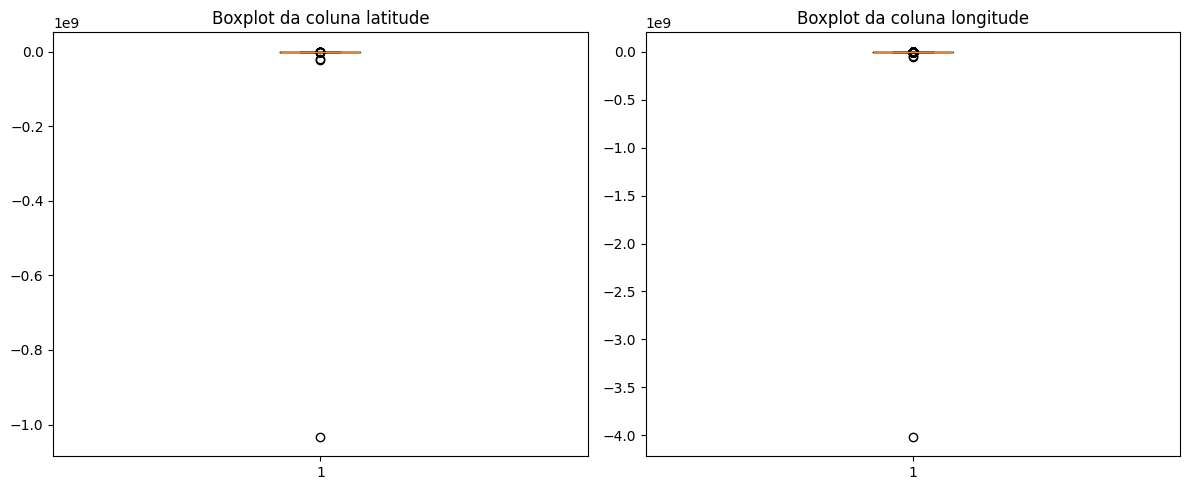

In [33]:
fig, ax = plt.subplots(1,2,figsize=(12,5), tight_layout=True)

ax[0].boxplot(df['latitude'])
ax[0].set_title('Boxplot da coluna latitude')

ax[1].boxplot(df['longitude'])
ax[1].set_title('Boxplot da coluna longitude')

plt.show()

In [34]:
# Encontrando outliers, considerando os valores máximos e mínimos possíveis de latitude (-90 a 90) e longitude (-180 a 180)
df[(df['latitude']<-90) | (df['latitude']>90) | (df['longitude']<-180) | (df['longitude']>180)]

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
114,terça-feira,19:00:00,MG,381.0,873.0,ESTIVA,Pista Escorregadia,Tombamento,Sem Vítimas,Pleno dia,...,0,0,0,1,0,0,1,-2.241851e+01,-4.059646e+02,2017-01-03 19:00:00
117,terça-feira,18:50:00,RJ,40.0,64.0,PETROPOLIS,Fenômenos da Natureza,Colisão com objeto em movimento,Com Vítimas Feridas,Plena Noite,...,0,0,1,1,0,1,1,-2.242356e+01,-7.631568e+02,2017-01-03 18:50:00
166,terça-feira,13:00:00,BA,101.0,323.4,PRESIDENTE TANCREDO NEVES,Ultrapassagem Indevida,Colisão lateral,Com Vítimas Feridas,Pleno dia,...,0,0,2,0,0,2,2,1.255456e+01,-4.113281e+02,2017-01-03 13:00:00
233,quinta-feira,19:45:00,SC,101.0,40.7,JOINVILLE,Falta de Atenção à Condução,Saída de leito carroçável,Sem Vítimas,Plena Noite,...,0,0,0,1,0,0,1,-2.631464e+01,3.111264e+02,2017-01-05 19:45:00
301,sexta-feira,20:40:00,MT,364.0,315.7,CAMPO VERDE,Ultrapassagem Indevida,Colisão lateral,Sem Vítimas,Plena Noite,...,0,0,0,4,0,0,4,1.580000e+02,5.530000e+02,2017-01-06 20:40:00
321,sábado,09:20:00,SP,116.0,292.0,ITAPECERICA DA SERRA,Velocidade Incompatível,Capotamento,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-2.373232e+01,-4.068950e+02,2017-01-07 09:20:00
355,sábado,22:25:00,PR,277.0,36.3,MORRETES,Falta de Atenção à Condução,Colisão traseira,Sem Vítimas,Plena Noite,...,0,0,0,2,0,0,2,-2.557372e+01,-4.088183e+02,2017-01-07 22:25:00
528,quarta-feira,09:00:00,PR,369.0,175.5,ROLANDIA,Condutor Dormindo,Colisão com objeto estático,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-2.332490e+07,-5.138635e+07,2017-01-11 09:00:00
24667,domingo,00:00:00,PR,153.0,56.9,SANTO ANTONIO DA PLATINA,Animais na Pista,Capotamento,Com Vítimas Feridas,Plena Noite,...,0,2,0,0,0,2,1,-2.336952e+01,3.099351e+02,2017-01-01 00:00:00
24729,domingo,08:00:00,MT,163.0,790.0,VERA,Velocidade Incompatível,Saída de leito carroçável,Sem Vítimas,Amanhecer,...,0,0,0,0,1,0,1,-1.227493e+01,-4.155582e+02,2017-01-01 08:00:00


Identificamos os valores acima como outliers. Porém ao verificar os dados das demais colunas, vimos que os outliers estavam apenas nas colunas de latitude e longitude, sendo provavelmente um erro de digitação. Pensamos em alterar apenas esses dados, mas decimos não fazer alterações, considerando que a princípio não utilizaremos essas colunas então retirar os registros completos não faz sentido.

### Pernambuco

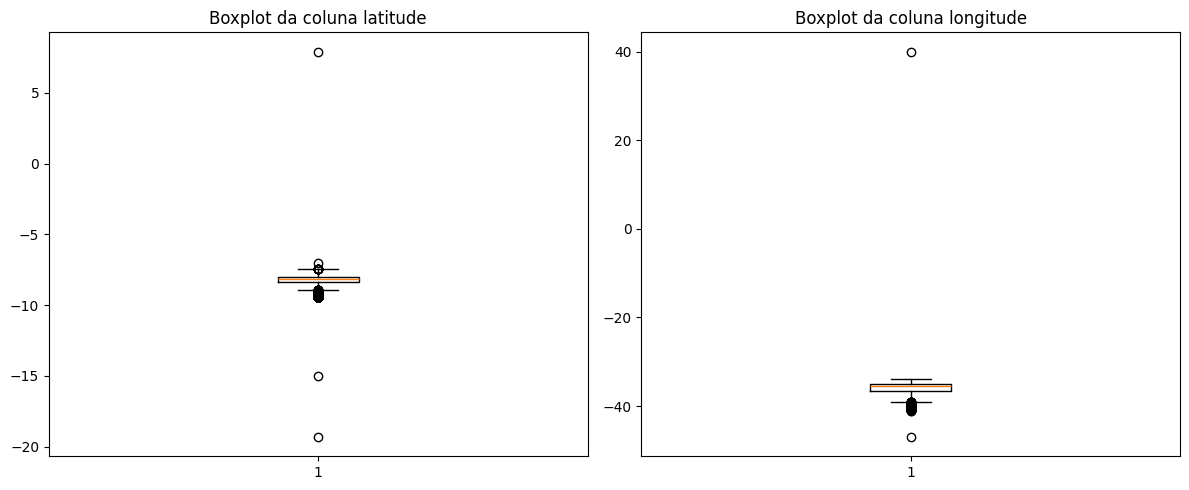

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(12,5), tight_layout=True)

ax[0].boxplot(df_pe['latitude'])
ax[0].set_title('Boxplot da coluna latitude')

ax[1].boxplot(df_pe['longitude'])
ax[1].set_title('Boxplot da coluna longitude')

plt.show()

In [36]:
# Os valores de latitude e Longitude de Pernambuco estão dentro do intervalo esperado
df_pe[(df_pe['latitude']<-13) | (df_pe['latitude']>-7.4)]

,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
372,domingo,11:00:00,PE,101.0,60.0,RECIFE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Pleno dia,...,0,0,0,2,0,0,2,-15.00000,-47.00000,2017-01-08 11:00:00
24825,domingo,17:40:00,PE,101.0,144.0,RIBEIRAO,Velocidade Incompatível,Queda de ocupante de veículo,Com Vítimas Feridas,Anoitecer,...,0,2,0,0,0,2,1,-19.31114,-34.74426,2017-01-01 17:40:00
24877,domingo,21:10:00,PE,101.0,59.0,RECIFE,Não guardar distância de segurança,Colisão traseira,Sem Vítimas,Plena Noite,...,0,0,0,20,0,0,5,-7.00000,-34.00000,2017-01-01 21:10:00
25910,sábado,23:35:00,PE,316.0,91.0,OURICURI,Falta de Atenção do Pedestre,Atropelamento de Pedestre,Com Vítimas Fatais,Plena Noite,...,1,0,0,1,0,0,1,7.90890,40.01630,2017-01-07 23:35:00


No caso dos outliers do banco de dados de Pernambuco, decidimos por apagar os registros, pois utilizamos os dados de latitude e longitude para gerar visualizações gráficas dos acidentes e mortes nas estradas e a presença dos outliers estava culminando em imagens incorretas.

In [37]:
df_pe.drop([372, 24825, 24877, 25910], axis=0, inplace = True)
df_pe[(df_pe['latitude']<-13) | (df_pe['latitude']>-7.4)]

C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\2128232510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe.drop([372, 24825, 24877, 25910], axis=0, inplace = True)


,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,classificacao_acidente,fase_dia,...,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente


# Exploração dos dados e Visualizações

## Questões a serem estudadas:

**Brasil**
- Número de acidentes e mortos por estado
- Gravidade dos acidentes por estado
- Fase do dia influencia na quantidade de acidentes? E na gravidade?
- Quantidade de acidentes de acordo com o clima, e a gravidade dos mesmos
- Quantidade de acidentes por dia da semana
- Quantidade de acidentes por causa do acidente
- Tipo de pista influencia na quantidade e gravidade dos acidentes?
- Número de vítmas por gravidade

**Pernambuco**
- Quais as estradas com mais acidentes? E com mais mortes?
- Quais os municípios com mais acidentes?
- Quais os municípios com acidentes mais graves?

### Acidentes por dia da semana

C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\3969916825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=day_accidents, x='dia_semana', y='accident_count', palette='Blues_r')


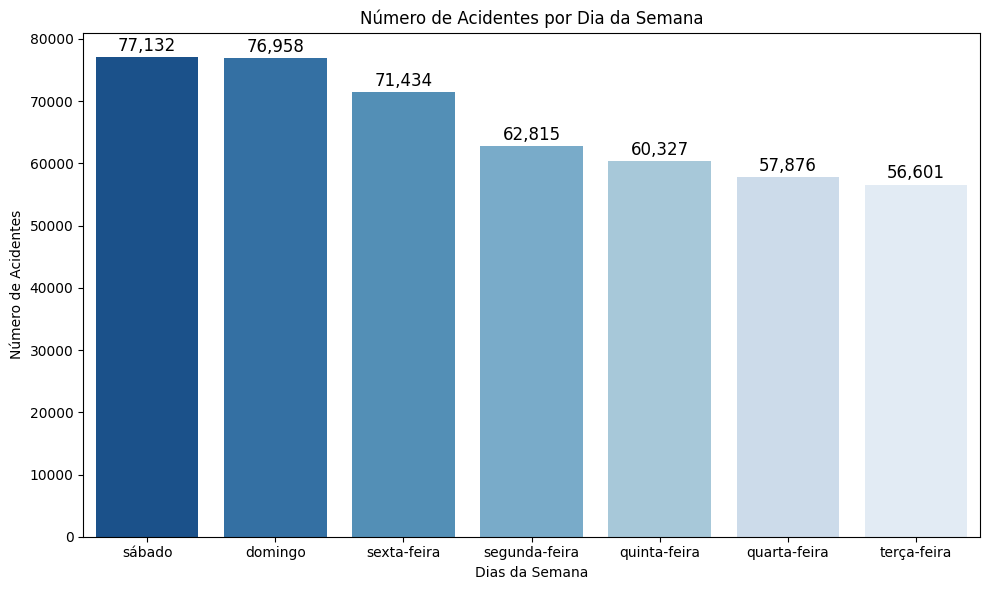

In [38]:
# Agrupar os dados por dia da semana e contar os acidentes
day_accidents = df.groupby('dia_semana').size().reset_index(name='accident_count').sort_values(by='accident_count', ascending=False)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=day_accidents, x='dia_semana', y='accident_count', palette='Blues_r')

# Adicionar os valores no topo de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 8), textcoords='offset points')

plt.title('Número de Acidentes por Dia da Semana')
plt.xlabel('Dias da Semana')
plt.ylabel('Número de Acidentes')
plt.tight_layout()
plt.show()


Identificamos a partir do gráfico acima que a maioria dos acidentes ocorrem nos finais de semana e nos dias mais próximos deles (sexta-feira e segunda-feira), o que pode ser devido a mais pessoas viajando e dirigindo nas BRs durante a folga do trabalho.

In [41]:
imagem = '../utils/bcim_2016_21_11_2018.gpkg'

### Estados do Brasil mais perigosos (e Pernambuco em relação a eles)

C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Oranges', len(df_mortes))
C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = brasil_mortes.geometry.centroid
C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Oranges', len(df_count))
C:\Users\mirel\AppDat

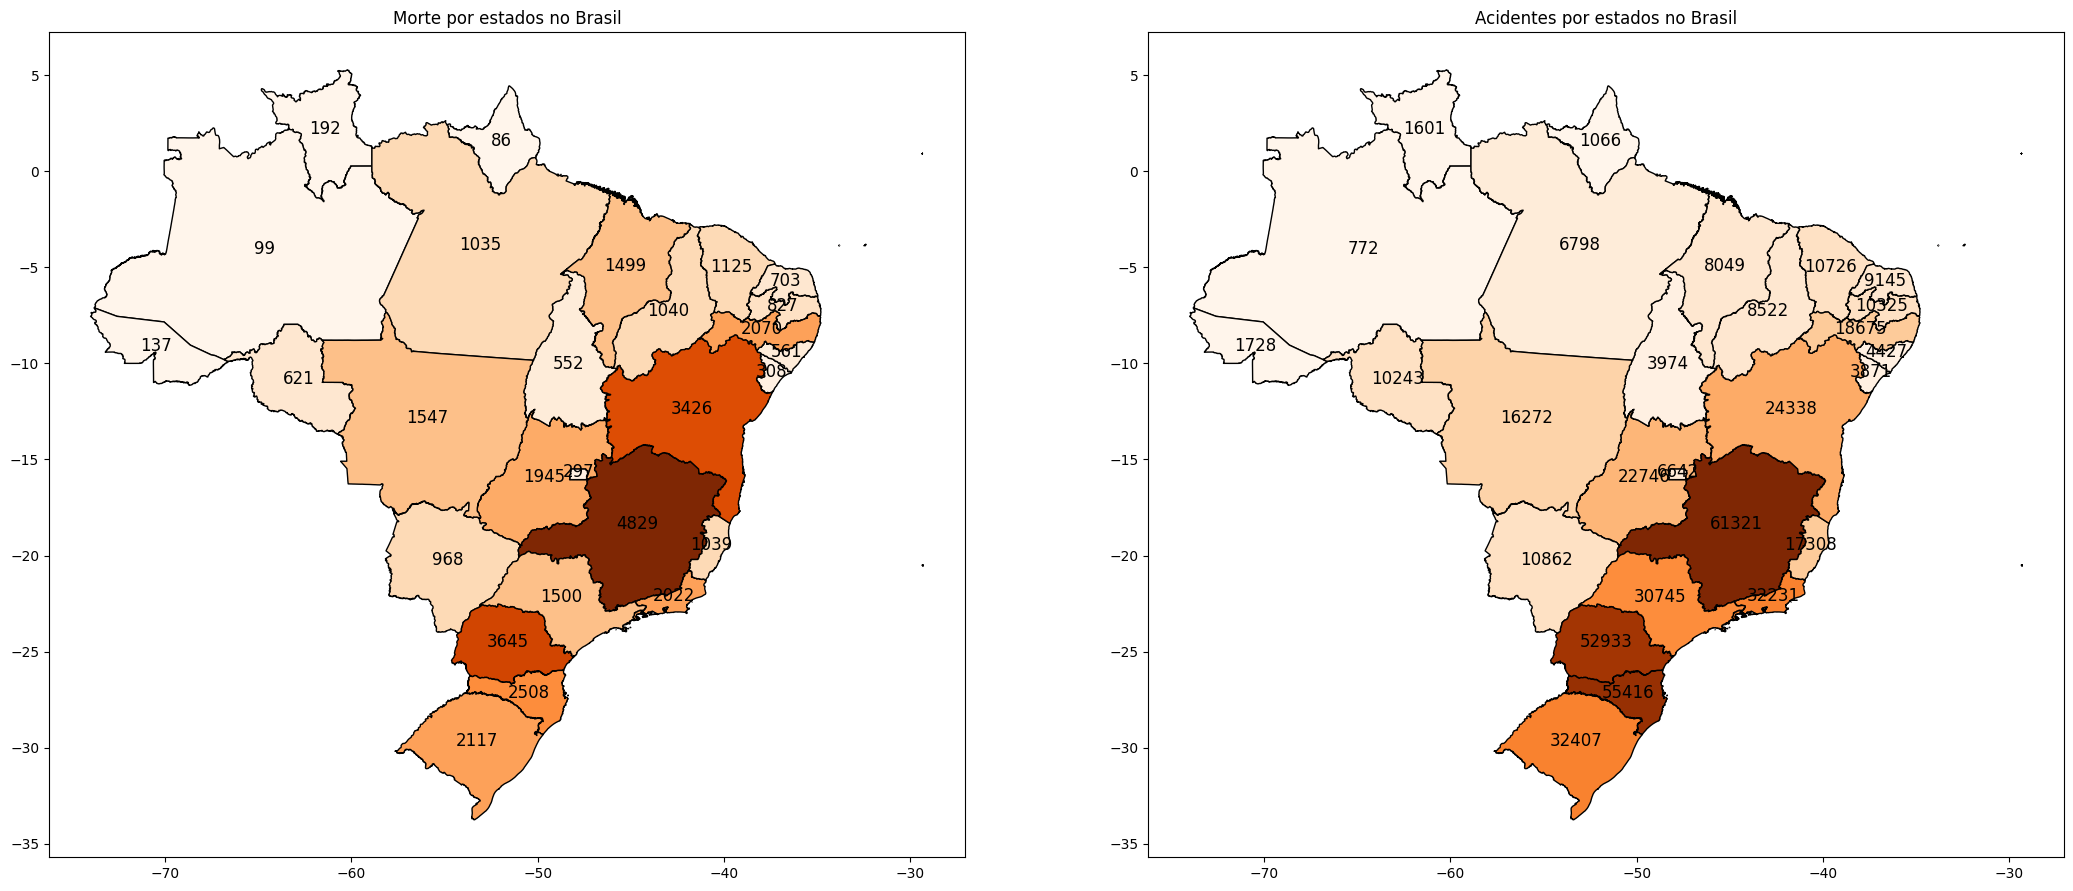

In [42]:
#Criação de df com os dados baixados do site do IBGE
info_ufs = gpd.read_file(imagem, layer = 'lim_unidade_federacao_a')
info_ufs.rename({'sigla': 'uf'}, axis=1, inplace=True)

#df de Mortes por estados
df_mortes = df[['uf', 'mortos']].groupby(by=df['uf']).agg({'mortos': 'sum'}).sort_values(by='mortos', ascending=False)

#Criação de nova df com junção de df_mortes e info_ufs
brasil_mortes = info_ufs.merge(df_mortes, on='uf', how='left')


fig,ax=plt.subplots(1,2, figsize=(26,13))

cmap = plt.cm.get_cmap('Oranges', len(df_mortes))

brasil_mortes.plot(column='mortos', cmap=cmap, figsize=(12,7), legend=False, edgecolor='black', ax=ax[0])

centroids = brasil_mortes.geometry.centroid
counts = brasil_mortes['mortos']

for idx, (centroid, count) in enumerate(zip(centroids, counts)):
  ax[0].annotate(f'{count:.0f}', (centroid.x, centroid.y), textcoords="offset points", xytext=(0,-2), ha='center', fontsize=12, color='black')

ax[0].set_title('Morte por estados no Brasil')

df_count=df['uf'].value_counts()
brasil_count=brasil_mortes = info_ufs.merge(df_count, on='uf', how='left')

cmap = plt.cm.get_cmap('Oranges', len(df_count))

brasil_count.plot(column='count', cmap=cmap, figsize=(12,7), legend=False, edgecolor='black', ax=ax[1])

centroids = brasil_count.geometry.centroid
counts = brasil_count['count']

for idx, (centroid, count) in enumerate(zip(centroids, counts)):
  ax[1].annotate(f'{count:.0f}', (centroid.x, centroid.y), textcoords="offset points", xytext=(0,-2), ha='center', fontsize=12, color='black')

ax[1].set_title('Acidentes por estados no Brasil')

plt.show()

C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Oranges', len(df_mortes))
C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:18: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = brasil_mortes.geometry.centroid
C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\925339505.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Oranges', len(df_count))
C:\Users\mirel\AppDat

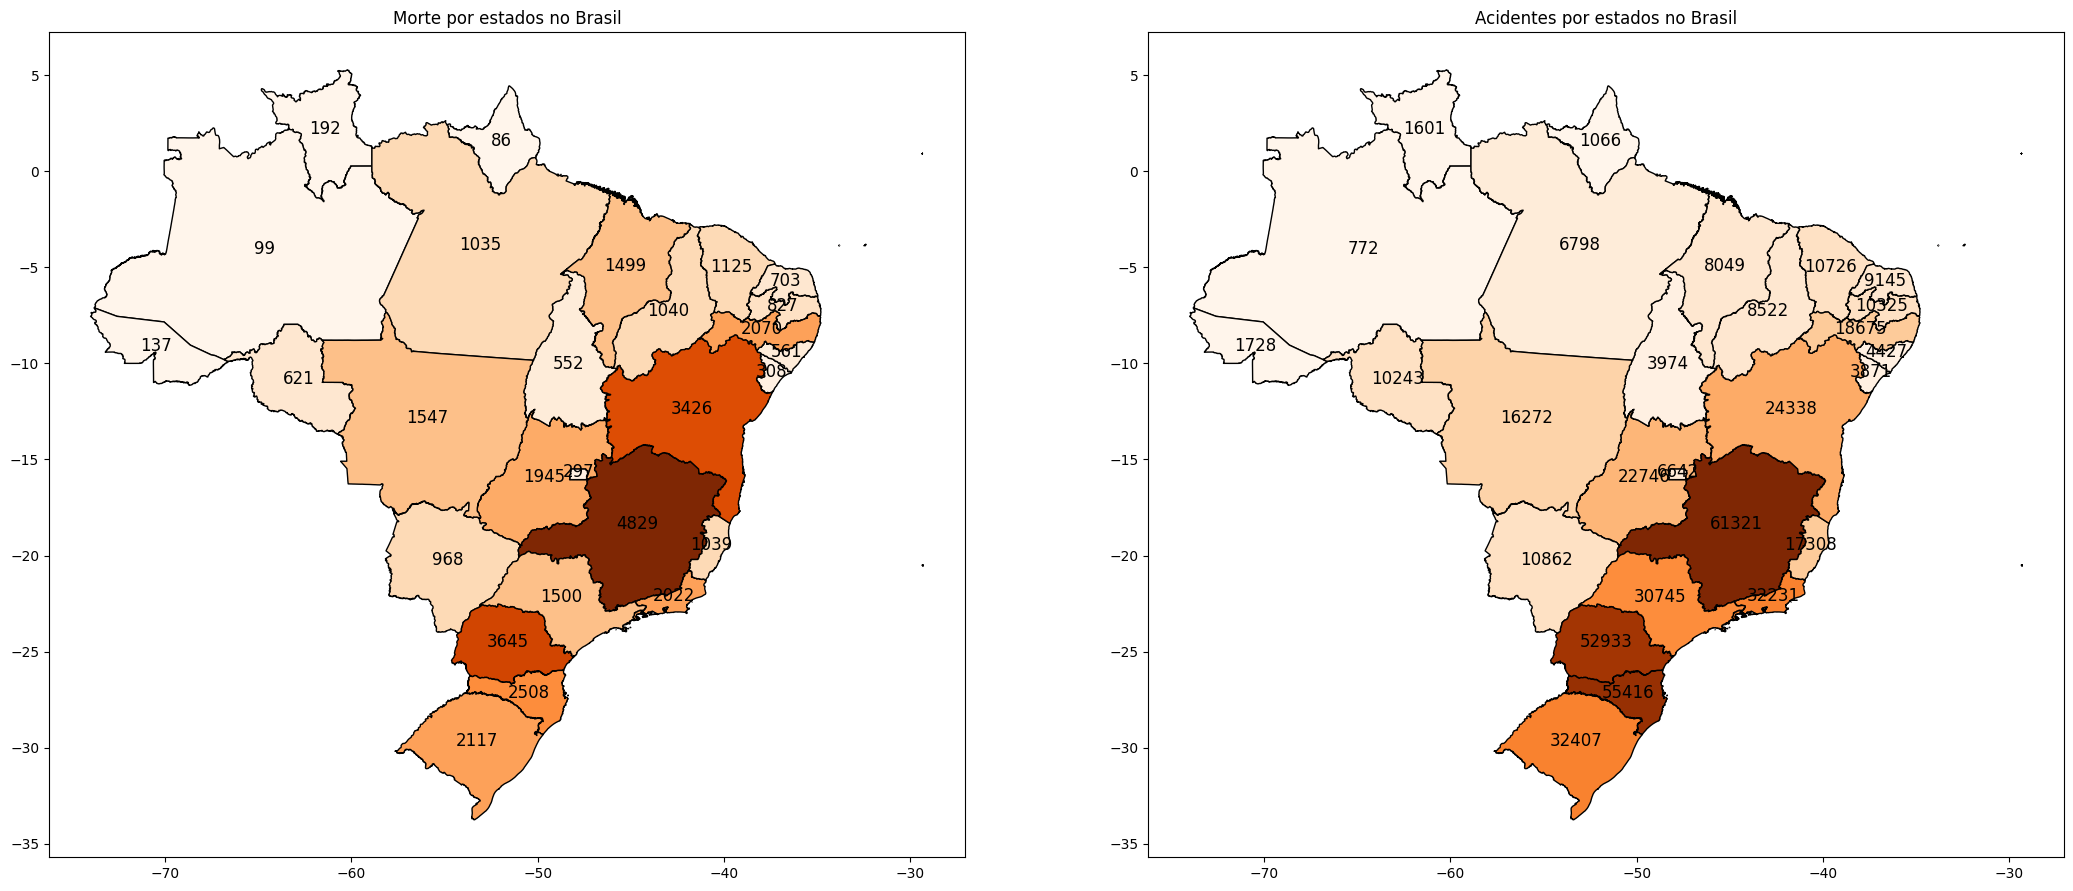

In [43]:
#Criação de df com os dados baixados do site do IBGE
info_ufs = gpd.read_file(imagem, layer = 'lim_unidade_federacao_a')
info_ufs.rename({'sigla': 'uf'}, axis=1, inplace=True)

#df de Mortes por estados
df_mortes = df[['uf', 'mortos']].groupby(by=df['uf']).agg({'mortos': 'sum'}).sort_values(by='mortos', ascending=False)

#Criação de nova df com junção de df_mortes e info_ufs
brasil_mortes = info_ufs.merge(df_mortes, on='uf', how='left')


fig,ax=plt.subplots(1,2, figsize=(26,13))

cmap = plt.cm.get_cmap('Oranges', len(df_mortes))

brasil_mortes.plot(column='mortos', cmap=cmap, figsize=(12,7), legend=False, edgecolor='black', ax=ax[0])

centroids = brasil_mortes.geometry.centroid
counts = brasil_mortes['mortos']

for idx, (centroid, count) in enumerate(zip(centroids, counts)):
  ax[0].annotate(f'{count:.0f}', (centroid.x, centroid.y), textcoords="offset points", xytext=(0,-2), ha='center', fontsize=12, color='black')

ax[0].set_title('Morte por estados no Brasil')

df_count=df['uf'].value_counts()
brasil_count=brasil_mortes = info_ufs.merge(df_count, on='uf', how='left')

cmap = plt.cm.get_cmap('Oranges', len(df_count))

brasil_count.plot(column='count', cmap=cmap, figsize=(12,7), legend=False, edgecolor='black', ax=ax[1])

centroids = brasil_count.geometry.centroid
counts = brasil_count['count']

for idx, (centroid, count) in enumerate(zip(centroids, counts)):
  ax[1].annotate(f'{count:.0f}', (centroid.x, centroid.y), textcoords="offset points", xytext=(0,-2), ha='center', fontsize=12, color='black')

ax[1].set_title('Acidentes por estados no Brasil')

plt.show()

C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\261384525.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=0)
C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\261384525.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=0)


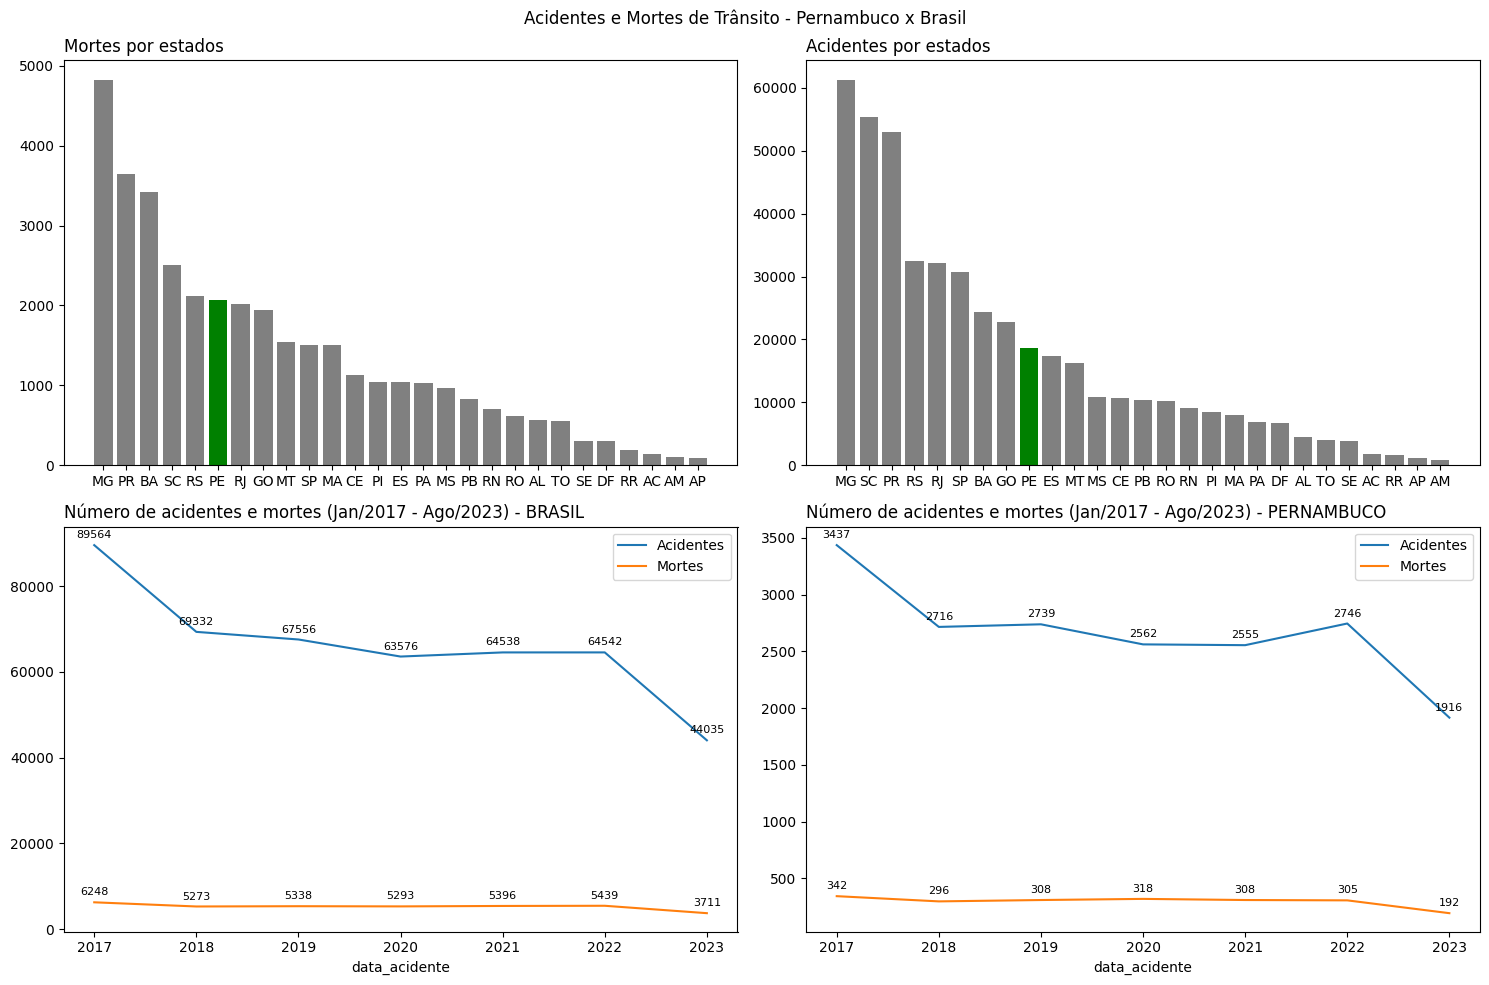

In [44]:
#Acidentes por estados
df_acidentes = df[['uf', 'data_acidente']].groupby(by=df['uf']).agg({'data_acidente': 'count'}).sort_values(by='data_acidente', ascending=False)

# Gráfico do Número de mortos por Estado
fig, ax = plt.subplots(2,2,figsize=(15,10), tight_layout=True)
fig.suptitle('Acidentes e Mortes de Trânsito - Pernambuco x Brasil')
cores = ['gray' if uf != 'PE' else 'green' for uf in df_mortes.index]
ax[0,0].bar(df_mortes.index, df_mortes['mortos'], color=cores)
ax[0,0].set_title('Mortes por estados', loc='left')
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(),rotation=0)

# Gráfico do Número de acidentes por Estado
cores2 = ['gray' if uf != 'PE' else 'green' for uf in df_acidentes.index]
ax[0,1].bar(df_acidentes.index, df_acidentes['data_acidente'], color=cores2)
ax[0,1].set_title('Acidentes por estados', loc='left')
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(),rotation=0)

#Número de mortos e acidentes por ano no Brasil
df_group = df[['data_acidente','mortos']].groupby(by=df['data_acidente'].dt.year).agg({'data_acidente':'count','mortos':'sum'})

# Evolução anual dos acidentes no Brasil
df_group[['data_acidente','mortos']].plot(kind='line',ax=ax[1,0])
ax[1,0].set_title('Número de acidentes e mortes (Jan/2017 - Ago/2023) - BRASIL',loc='left')
ax[1, 0].legend(['Acidentes', 'Mortes'])
for x, y in zip(df_group.index, df_group['data_acidente']):
    ax[1,0].annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)
for x, y in zip(df_group.index, df_group['mortos']):
    ax[1,0].annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

#Número de mortos e acidentes por ano em Pernambuco
df_group_pe = df_pe[['data_acidente','mortos']].groupby(by=df_pe['data_acidente'].dt.year).agg({'data_acidente':'count','mortos':'sum'})

# Evolução anual dos acidentes no Pernambuco
df_group_pe[['data_acidente','mortos']].plot(kind='line',ax=ax[1,1])
ax[1, 1].legend(['Acidentes', 'Mortes'])
ax[1,1].set_title('Número de acidentes e mortes (Jan/2017 - Ago/2023) - PERNAMBUCO',loc='left')
for x, y in zip(df_group_pe.index, df_group_pe['data_acidente']):
    ax[1,1].annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

for x, y in zip(df_group_pe.index, df_group_pe['mortos']):
    ax[1,1].annotate(f'{y}', xy=(x, y), xytext=(0, 5), textcoords='offset points', ha='center', fontsize=8)

plt.show()

### Acidentes por fase do dia no Brasil

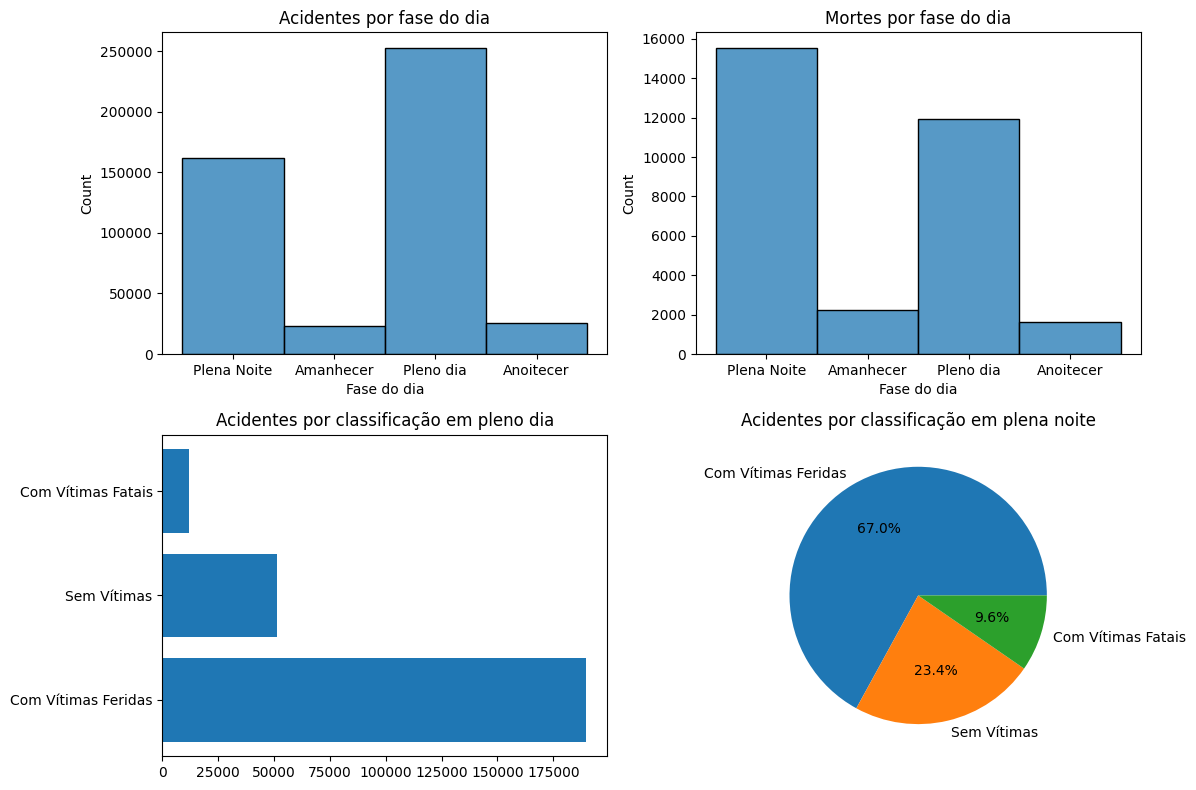

In [45]:
fig, ax = plt.subplots(2,2,figsize=(12,8), tight_layout=True)

sns.histplot(df['fase_dia'], ax=ax[0,0])
ax[0,0].set_title('Acidentes por fase do dia')
ax[0,0].set_xlabel('Fase do dia')

sns.histplot(df[(df['mortos']>0)]['fase_dia'], ax=ax[0,1])
ax[0,1].set_title('Mortes por fase do dia')
ax[0,1].set_xlabel('Fase do dia')

# mortal
# sns.histplot(df_pe[(df_pe['br']==232)&(df_pe['mortos']>0)]['horario'].dt.hour, ax=ax[1],bins=23)

data = df[df['fase_dia'] == 'Pleno dia']['classificacao_acidente'].value_counts()
ax[1, 0].barh(data.index, data.values)
# plt.plot(kind = 'barh', df[(df['fase_dia']=='Pleno dia')]['classificacao_acidente'].value_counts(), ax=ax[1,0])
ax[1,0].set_title('Acidentes por classificação em pleno dia')

ax[1,1].pie(df[(df['fase_dia']=='Plena Noite')]['classificacao_acidente'].value_counts(), labels=df['classificacao_acidente'].value_counts().index, autopct='%1.1f%%')
ax[1,1].set_title('Acidentes por classificação em plena noite')

plt.show()

### Análise de Pernambuco (Mortes por BR e mais)

In [46]:
#Informação geral dos dados
df_pe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18671 entries, 15 to 462977
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   dia_semana              18671 non-null  object        
 1   horario                 18671 non-null  object        
 2   uf                      18671 non-null  object        
 3   br                      18627 non-null  float64       
 4   km                      18627 non-null  float64       
 5   municipio               18671 non-null  object        
 6   causa_acidente          18671 non-null  object        
 7   tipo_acidente           18670 non-null  object        
 8   classificacao_acidente  18671 non-null  object        
 9   fase_dia                18671 non-null  object        
 10  sentido_via             18671 non-null  object        
 11  condicao_metereologica  18671 non-null  object        
 12  tipo_pista              18671 non-null  object   

In [47]:
#Análise descritiva df_pe
df_pe.describe()

,br,km,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,data_acidente
count,18627.000000,18627.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671.000000,18671
mean,216.222849,106.818919,2.347651,0.110814,0.740346,0.297520,0.989824,0.209148,1.037866,1.703712,-8.274927,-36.287156,2020-03-29 00:52:20.174602240
min,101.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-9.433896,-41.022690,2017-01-01 00:30:00
25%,101.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-8.396659,-36.648375,2018-06-09 01:05:00
50%,232.000000,77.400000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-8.143676,-35.432220,2020-03-01 05:15:00
75%,232.000000,126.600000,3.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000,-8.020622,-34.946280,2021-12-31 13:00:00
max,428.000000,559.400000,52.000000,5.000000,33.000000,12.000000,50.000000,15.000000,35.000000,14.000000,-7.446132,-34.856590,2023-08-31 18:00:00
std,123.915158,99.581311,1.511328,0.355967,1.012858,0.616948,1.181587,0.509906,1.131528,0.711860,0.421418,1.813825,NaN


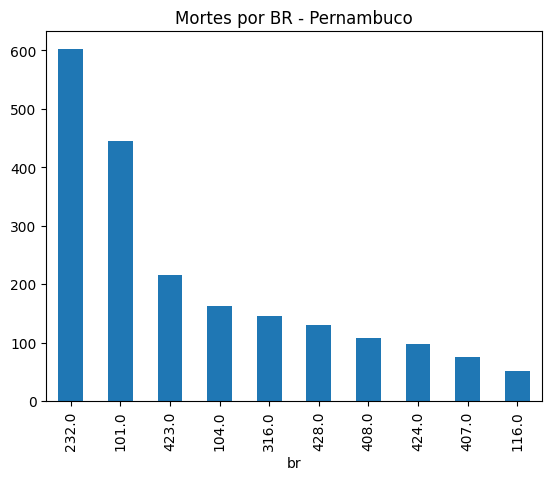

In [48]:
#BRs com maior número de mortes
df_pe[['br','mortos']].groupby('br').agg({'mortos':'sum'}).sort_values('mortos', ascending=False).head(10).plot(kind='bar', legend=False)
plt.title('Mortes por BR - Pernambuco')
plt.show()

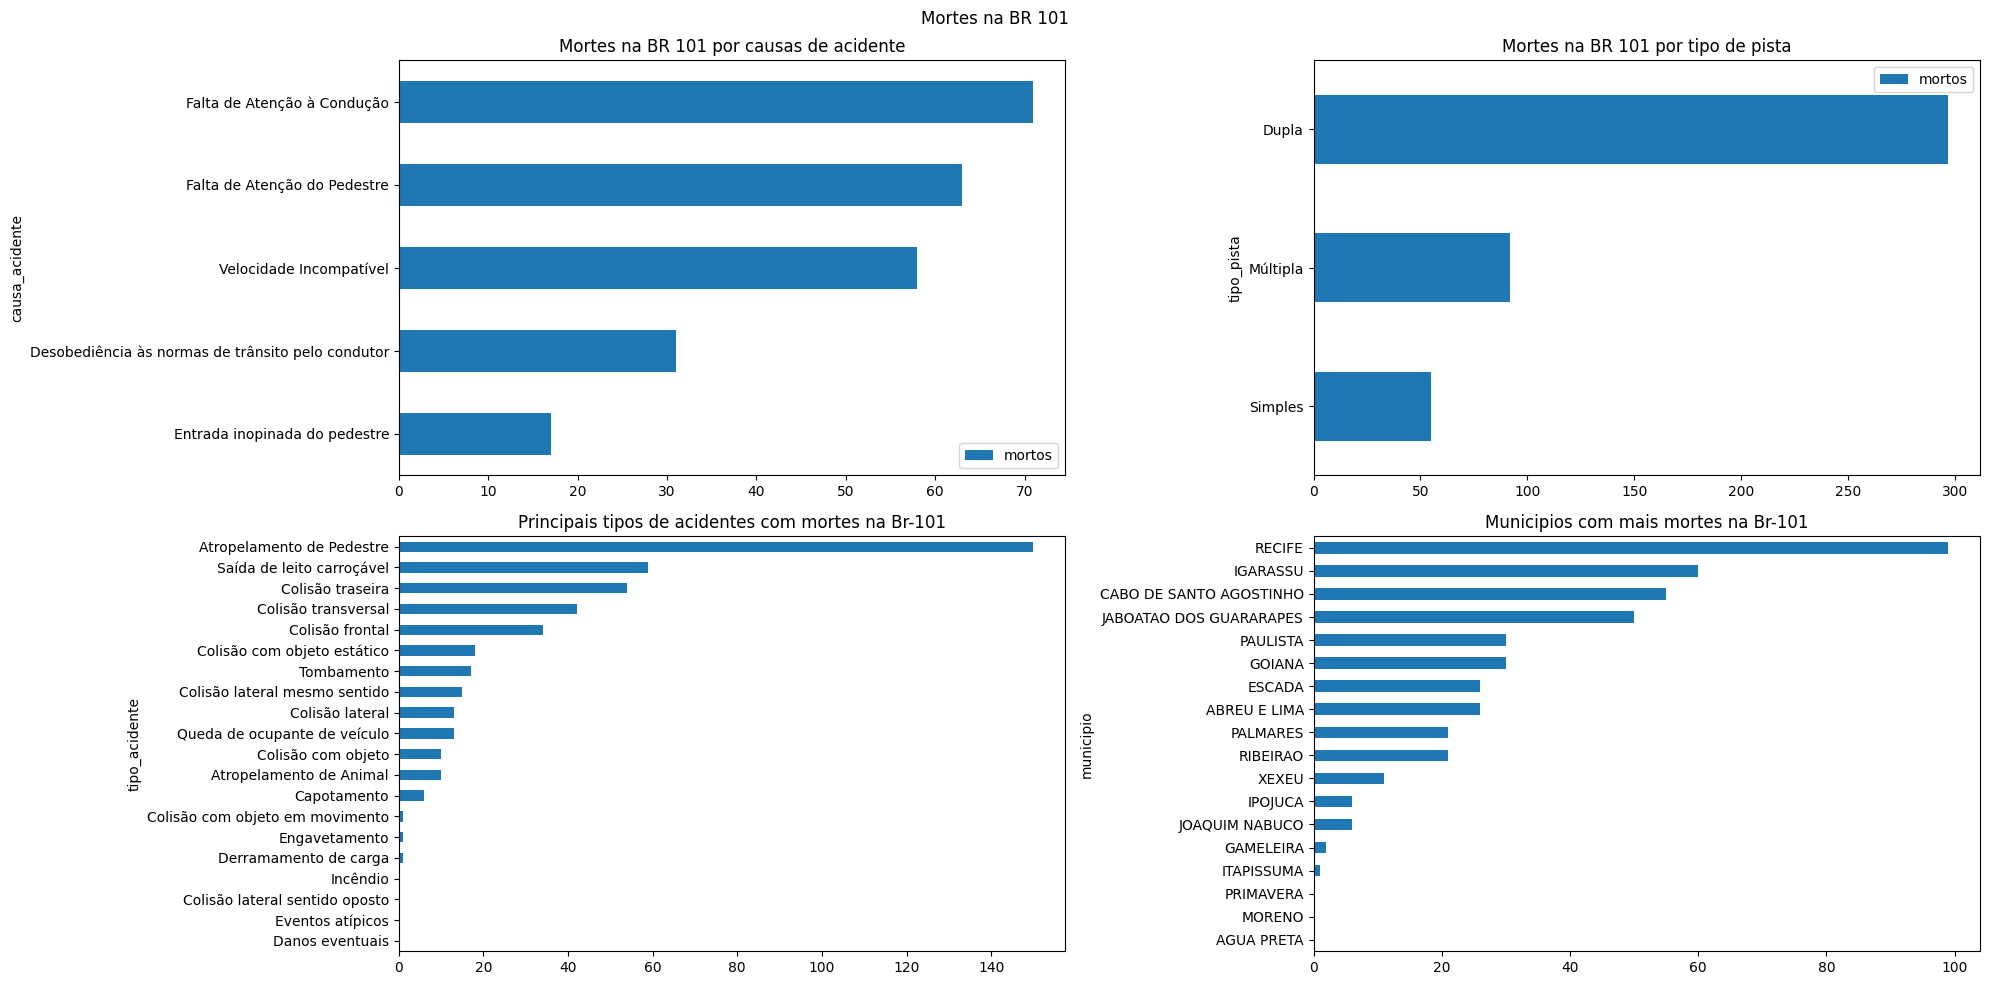

In [49]:
fig, ax = plt.subplots(2,2,tight_layout=True, figsize=(20,10))
fig.suptitle('Mortes na BR 101')

df_pe[df_pe['br']==101][['causa_acidente','mortos']].groupby('causa_acidente').agg({'mortos':'sum'}).sort_values('mortos').tail(5).plot.barh(ax=ax[0,0])
ax[0,0].set_title('Mortes na BR 101 por causas de acidente')

df_pe[df_pe['br']==101][['tipo_pista','mortos']].groupby('tipo_pista').agg({'mortos':'sum'}).sort_values('mortos').plot.barh(ax=ax[0,1])
ax[0,1].set_title('Mortes na BR 101 por tipo de pista')

df_pe[df_pe['br']==101][['tipo_acidente','mortos']].groupby('tipo_acidente').agg({'mortos':'sum'}).sort_values('mortos').plot.barh(legend=False, ax=ax[1,0])
ax[1,0].set_title('Principais tipos de acidentes com mortes na Br-101')

df_pe[df_pe['br']==101][['municipio','mortos']].groupby('municipio').agg({'mortos':'sum'}).sort_values('mortos').plot.barh(legend=False, ax=ax[1,1])
ax[1,1].set_title('Municipios com mais mortes na Br-101')
plt.show()


C:\Users\mirel\AppData\Local\Temp\ipykernel_48200\215987839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pe['km_round']=df_pe['km'].round(0)


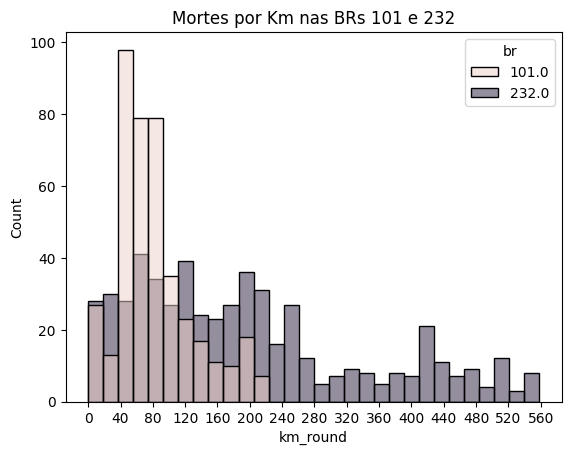

In [50]:
df_pe['km_round']=df_pe['km'].round(0)
fig, ax = plt.subplots()

data=df_pe[((df_pe['br']==101)|(df_pe['br']==232))&(df_pe['mortos']>0)]

sns.histplot(data, x='km_round',hue='br', bins=30)
ax.set_xticks(range(0,600,40))
ax.set_title('Mortes por Km nas BRs 101 e 232')
plt.show()

# Insights Pernambuco

- Pernambuco é o 6º estado em número de mortes nas BRs e o 9º estado em número de acidentes nas BRs no período de Janeiro 2017 até Agosto de 2023
- Números de acidentes em Pernambuco apresentou queda entre 2017 e 2022 com maior redução em 2018
- Número de mortes em Pernambuco reduziu em 2018 porém oscilou entre 2018 e 2022
- **BRs 101 e 232** são as rodovias com maior número de mortes no período
- Alta concentração de acidentes com mortes na **BR 101 entre os KMs 40 e 100** (De Igarassu até o Cabo de Santo agostinho)
- **Atropelamento de pedestre** é o tipo de acidentes com mortes mais comum na BR 101
- **Falta de atenção à condução** é a principal causa de acidentes na BR 101